# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mlchecks.checks.leakage import *
from mlchecks.base import Dataset

# Generating data:

In [2]:
df = pd.DataFrame(np.random.randn(100, 3), columns=['x1', 'x2', 'x3'])
df['x4'] = df['x1'] * 0.5 + df['x2']
df['label'] = df['x2'] + 0.1 * df['x1']
df['x5'] = df['label'].apply(lambda x: 'v1' if x < 0 else 'v2')


In [3]:
ds = Dataset(df, label='label')

# Running single_feature_contribution check:

Single Feature Contribution

Return the PPS (Predictive Power Score) of all features in relation to the label.

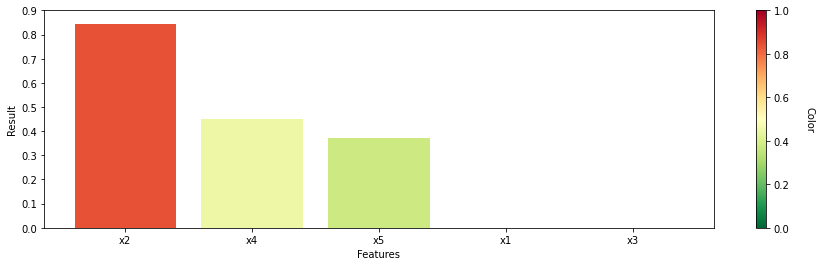

The PPS represents the ability of a feature to single-handedly predict another feature or label.

A high PPS (close to 1) can mean that this feature's success in predicting the label is actually due to data

leakage - meaning that the feature holds information that is based on the label to begin with.

In [4]:
SingleFeatureContribution().run(ds)

# Using the SingleFeatureContribution check class:

Single Feature Contribution

Return the PPS (Predictive Power Score) of all features in relation to the label.

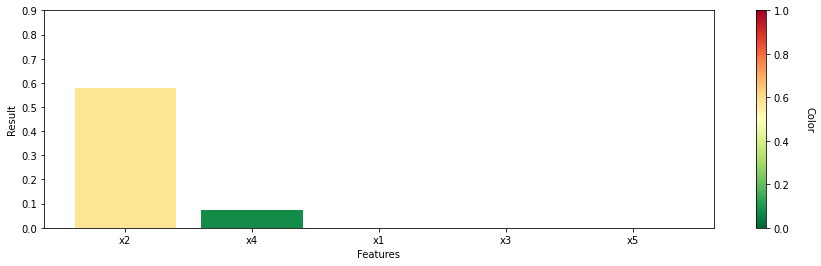

The PPS represents the ability of a feature to single-handedly predict another feature or label.

A high PPS (close to 1) can mean that this feature's success in predicting the label is actually due to data

leakage - meaning that the feature holds information that is based on the label to begin with.

In [5]:
my_check = SingleFeatureContribution(ppscore_params={'sample': 10})
my_check.run(dataset=ds)

# Generating data:

In [6]:
df_validation = df.copy()
df_validation['x2'] = df['x2'] + 0.5 * df['x1']
df_validation['x3'] = 0.3 * df['x3'] + df['label']


In [7]:
ds_validation = Dataset(df_validation, label='label')

# Running single_feature_contribution_train_validation check:

Single Feature Contribution Train-Validation

Return the difference in PPS (Predictive Power Score) of all features between train and validation datasets.

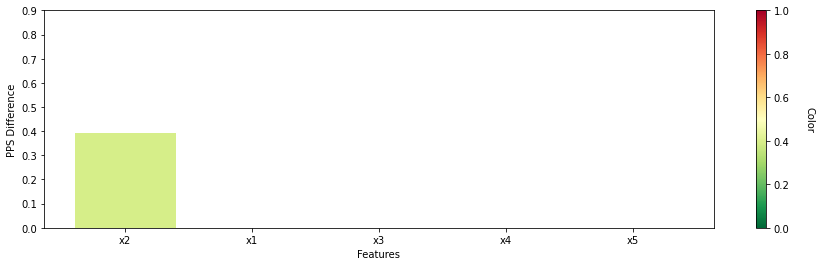

The PPS represents the ability of a feature to single-handedly predict another feature or label.

A high PPS (close to 1) can mean that this feature's success in predicting the label is actually due to data

leakage - meaning that the feature holds information that is based on the label to begin with.

When we compare train PPS to validation PPS, A high difference can strongly indicate leakage, as a feature

that was powerful in train but not in validation can be explained by leakage in train that is not relevant to a new dataset.

In [8]:
SingleFeatureContributionTrainValidation().run(train_dataset=ds, validation_dataset=ds_validation)

# Using the SingleFeatureContributionTrainValidation check class:

Single Feature Contribution Train-Validation

Return the difference in PPS (Predictive Power Score) of all features between train and validation datasets.

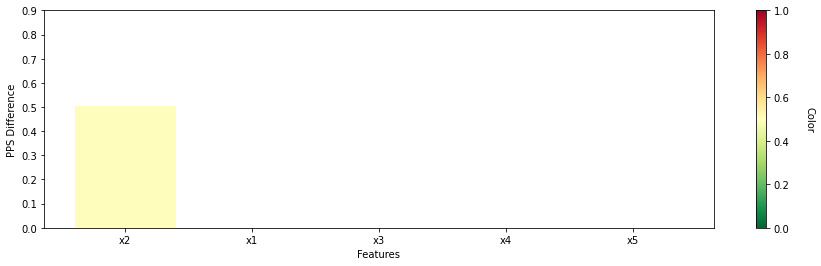

The PPS represents the ability of a feature to single-handedly predict another feature or label.

A high PPS (close to 1) can mean that this feature's success in predicting the label is actually due to data

leakage - meaning that the feature holds information that is based on the label to begin with.

When we compare train PPS to validation PPS, A high difference can strongly indicate leakage, as a feature

that was powerful in train but not in validation can be explained by leakage in train that is not relevant to a new dataset.

In [9]:
my_check = SingleFeatureContributionTrainValidation(ppscore_params={'sample': 10})
my_check.run(train_dataset=ds, validation_dataset=ds_validation)